# Analyse tracks

This is the analysis notebook. All data preparation is done in `track_organoids.ipynb`. For each of the files listed in `files`, the following steps are performed:

 - load mean organoid statistics
 - compare mean velocities between experimental conditions

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def find_experiment_and_conditions(df):

    df['experiment_name'] = df.movie_name.str.split('/').str[-3].str.split('-').str[0]
    df['experiment_conditions'] = df.movie_name.str.split('/').str[-3].str.split('-').str[1:].str.join('-')

    return df

In [3]:
analysis_image_dir = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/analysis_image'

if not os.path.exists(analysis_image_dir):
    os.makedirs(analysis_image_dir)


path_to_imgs = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics/organoid_statistics.csv'
organoid_statistics = pd.read_csv(path_to_imgs)
organoid_statistics = find_experiment_and_conditions(organoid_statistics)

path_to_imgs = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics/velocity_stats.csv'
velocity_stats = pd.read_csv(path_to_imgs)
velocity_stats = find_experiment_and_conditions(velocity_stats)


In [4]:
experiment_to_analyse = 'ECB025'

organoid_statistics = organoid_statistics[organoid_statistics.experiment_name == experiment_to_analyse]
velocity_stats = velocity_stats[velocity_stats.experiment_name == experiment_to_analyse]

experiment_analysis_image_dir = os.path.join(analysis_image_dir, experiment_to_analyse)

if not os.path.exists(experiment_analysis_image_dir):
    os.makedirs(experiment_analysis_image_dir)

## Analysing instantaneous data

We compare the experiment properties as a function of time. Here we mostly choose to compare the velocity of the spheroids in different conditions as well as the evolution of their circularity.

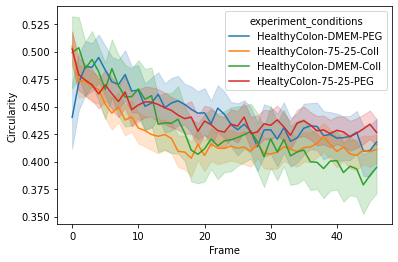

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(data=velocity_stats, x='frame', y='circularity', hue='experiment_conditions')

ax.set_xlabel('Frame')
ax.set_ylabel('Circularity')

plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'circularities_per_time.pdf'))

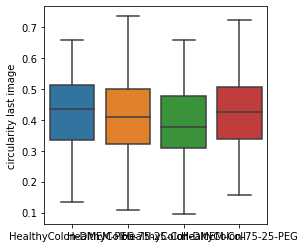

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(x='experiment_conditions', 
    y='circularity', 
    data=velocity_stats[velocity_stats.frame > velocity_stats.frame.max()-1],
    ax=ax,
    showfliers=False)

ax.set_ylabel('circularity last image')
ax.set_xlabel('')
plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'circularities_last_image.pdf'))

## Analysing mean data

We compare the mean properties of the spheroid experiment by experiment. To remove outliers we only keep spheroids with more than 10 timepoints and with an area above 1000 pixels.

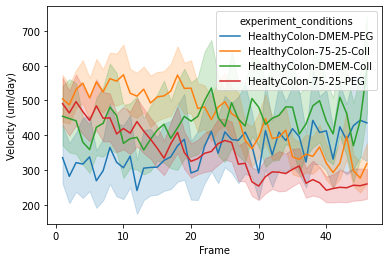

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(data=velocity_stats, x='frame', y='velocity', hue='experiment_conditions')

ax.set_xlabel('Frame')
ax.set_ylabel('Velocity (um/day)')

plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'velocities_per_time.pdf'))

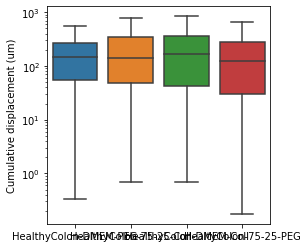

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(x='experiment_conditions', 
    y='cumulative_displacement', 
    data=organoid_statistics,
    ax=ax,
    showfliers=False)

ax.set_yscale('log')
ax.set_ylabel('Cumulative displacement (um)')
ax.set_xlabel('')
plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'cumulative_displacement.pdf'))

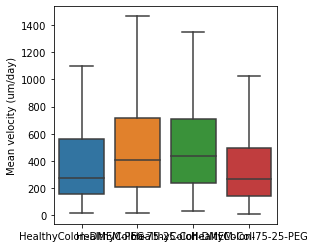

In [10]:

fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(x='experiment_conditions', 
    y='velocity_mean', 
    data=organoid_statistics,
    ax=ax,
    showfliers=False)

ax.set_ylabel('Mean velocity (um/day)')
ax.set_xlabel('')
plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'mean_velocity.pdf'))

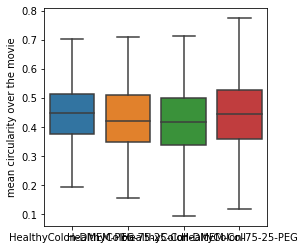

In [11]:

fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(x='experiment_conditions', 
    y='circularity', 
    data=organoid_statistics,
    ax=ax,
    showfliers=False)

ax.set_ylabel('mean circularity over the movie')
ax.set_xlabel('')
plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'mean_circularity.pdf'))